In [1]:
import numpy as np
import pandas as pd
from numba import njit
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
# from organism import *

## The following cell only creates the organisms dictionary

In [2]:
## Function that takes the name of organism, an array without padding, number of rotations possible for each shape and possible flips

def add_org(title, org, rot=1, flip=False):
    global Organisms
    org = np.pad(org, 1)                # Add a number of zeros around the matrix of the shape of the organism (in a sence making neighbors in order not to count other organisms) 
    padd_org = [org.astype(np.int8)]    # Convert them to int8 for sake of @njit 
    
    for i in range(rot-1):              # For number of 90 degrees rotations an organism might has (-1 so it does not count the organism itelf twice)
        org = np.rot90(org)             # Rotate 90 degrees
        padd_org.append(org)            # Add to the list of shapes
    
    if flip:                            # For number of flips (over the horizontal or vertical symmetry)  an organism might has
        org = np.flip(org, axis=0)      # Make the Flip
        padd_org.append(org)            # Make the padding like before
        for i in range(rot-1):          # For number of 90 degrees rotations the flipped organism might has
            org = np.rot90(org)         # Make the rotation
            padd_org.append(org)        # Add to the list of shapes
            
    Organisms |= {title: padd_org}      # Add all the shapes to the main dictionary

## Now we make the dictionary of the organisms using the function "add_org"  
Organisms = {}

add_org( "Block" , np.array( [ [1, 1] , [1, 1] ] ) , rot = 1 )

add_org( "Bee Hive" , np.array( [ [0,1,1,0] , [1,0,0,1] , [0,1,1,0] ] ) , rot = 2 )

add_org( "Loaf" , np.array( [ [0,1,1,0] , [1,0,0,1] , [0,1,0,1] , [0,0,1,0] , ] ) , rot = 4 )

add_org( "Boat" , np.array( [ [1,1,0] , [1,0,1] , [0,1,0] ] ) , 4 )

add_org( "Ship" , np.array( [ [1,1,0] , [1,0,1] , [0,1,1] ] ) , 2 )

add_org( "Tub" , np.array( [ [0,1,0] , [1,0,1] , [0,1,0] ] ) , 1 )

add_org( "Pond" , np.array( [ [0,1,1,0] , [1,0,0,1] , [1,0,0,1] , [0,1,1,0] ] ), 1 )

add_org( "Long Boat" , np.array( [ [0,0,1,0] , [0,1,0,1] , [1,0,1,0] , [1,1,0,0] ] ) , 4 )

add_org( "Ship Tie" , np.array( [ [0,0,0,0,1,1] , [0,0,0,1,0,1] , [0,0,0,1,1,0] , [0,1,1,0,0,0] , [1,0,1,0,0,0] , [1,1,0,0,0,0] ] ) , 2 )

add_org( "Barge" , np.array( [ [0,0,1,0] , [0,1,0,1] , [1,0,1,0] , [0,1,0,0] ] ) , 2 )

add_org( "Blinker" , np.array( [ [0,0,0] , [1,1,1] , [0,0,0] ] ) , 2 )

add_org( "Eater", np.array( [ [1,1,0,0] , [1,0,1,0] , [0,0,1,0] , [0,0,1,1] ] ) , 4 , 1 )

add_org( "Hat" , np.array( [ [0,0,1,0,0] , [0,1,0,1,0] , [0,1,0,1,0] , [1,1,0,1,1] ] ) , 4 )

add_org( "Integral" , np.array( [ [0,0,0,1,1] , [0,0,1,0,1] , [0,0,1,0,0] , [1,0,1,0,0] , [1,1,0,0,0] ] ) , 2)

add_org( "Boat Tie" , np.array( [ [0,1,0,0,0,0] , [1,0,1,0,0,0] , [0,1,1,0,0,0] , [0,0,0,1,1,0] , [0,0,0,1,0,1] , [0,0,0,0,1,0] ] ) , 2)

add_org( "Loop" , np.array( [ [0,1,1,0,0] , [1,0,0,1,0] , [0,1,0,1,0] , [1,1,0,1,1] ] ) , 4 , 1 )

add_org( "Elevener" , np.array( [ [0,0,0,0,1,1] , [0,0,0,1,0,1] , [0,0,0,1,0,0] , [0,1,1,1,0,0] , [1,0,0,0,0,0] , [1,1,0,0,0,0] ] ) , 4 )

add_org( "Mirrored Table" , np.array( [ [1,1,0,1,1] , [0,1,0,1,0] , [0,1,0,1,0] , [1,1,0,1,1] ] ) , 2)

add_org( "Sesquihat" , np.array( [ [0,0,0,0,1,0,0] , [1,1,0,1,0,1,0] , [0,1,0,1,0,1,0] , [0,1,0,1,0,1,1] , [0,0,1,0,0,0,0] ] ) , 4 , 1 )

add_org( "Fourteener" , np.array( [ [0,0,0,0,1,1,0] , [1,1,0,0,1,0,1] , [1,0,0,0,0,0,1] , [0,1,1,1,1,1,0] , [0,0,0,1,0,0,0] ] ) , 4 , 1 )

add_org( "Paperclip" , np.array( [ [0,0,1,1,0] , [0,1,0,0,1] , [0,1,0,1,1] , [1,1,0,1,0] , [1,0,0,1,0] , [0,1,1,0,0] ] ) , 4 , 1 )

add_org( "Moose Antlers" , np.array( [ [1,1,0,0,0,0,0,1,1] , [1,0,0,0,0,0,0,0,1] , [0,1,1,1,0,1,1,1,0] , [0,0,0,1,0,1,0,0,0] , [0,0,0,0,1,0,0,0,0] ] ) , 4 )

add_org( "Mirrored Cap" , np.array( [ [0,1,1,0,1,1,0] , [1,0,1,0,1,0,1] , [1,0,1,0,1,0,1] , [0,1,1,0,1,1,0] ] ) , 2 )

add_org( "Scorpion" , np.array( [ [0,0,0,1,0,0,0] , [0,1,1,1,0,0,0] , [1,0,0,0,1,1,0] , [1,0,1,0,1,0,1] , [0,1,1,0,1,0,1] , [0,0,0,0,0,1,0] ] ) , 4 , 1 )

add_org( "Twin Hat" , np.array( [ [0,0,1,0,0,0,1,0,0] , [0,1,0,1,0,1,0,1,0] , [0,1,0,1,0,1,0,1,0] , [1,1,0,1,0,1,0,1,1] , [0,0,0,0,1,0,0,0,0] ] ) , 4 )

add_org( "Spiral" , np.array( [ [1,1,0,0,0,0,1] , [0,1,0,0,1,1,1] , [0,1,0,1,0,0,0] , [0,0,1,0,1,0,0] , [0,0,0,1,0,1,0] , [1,1,1,0,0,1,0] , [1,0,0,0,0,1,1] ] ) , 1 , 1 )

add_org( "Blinker" , np.array( [ [0,0,0] , [1,1,1] , [0,0,0] ] ) , 2 )

add_org( "Toad" , np.array( [ [0,1,1,0] , [1,0,0,0] , [0,0,0,1] , [0,1,1,0] ] ) , 2 , 1 )

add_org( "Toad2" , np.array( [ [1,0] , [1,1] , [1,1] , [0,1] ] ) , 2 , 1 )

Organisms['Toad'] = Organisms['Toad'] + Organisms['Toad2']
del Organisms['Toad2']

add_org( "Beacon" , np.array( [ [1,1,0,0] , [1,1,0,0] , [0,0,1,1] , [0,0,1,1] ] ) , 2 )

add_org( "Beacon2" , np.array( [ [1,1,0,0] , [1,0,0,0] , [0,0,0,1] , [0,0,1,1] ] ) , 2 )

Organisms['Beacon'] = Organisms['Beacon'] + Organisms['Beacon2']
del Organisms['Beacon2']

add_org( "Glider" , np.array( [ [0,1,0] , [0,0,1] , [1,1,1] ] ) , 4 , 1 )

add_org( "Glider2", np.array([ [1,0,1], [0,1,1], [0,1,0] ]), 4,1)

Organisms['Glider'] = Organisms['Glider'] + Organisms['Glider2']
del Organisms['Glider2']

add_org("Catfish", np.array( [ [0,0,1,1,1,0,0,0,1,1,1,0,0] , [0,0,0,0,0,0,0,0,0,0,0,0,0],[1,0,0,0,0,1,0,1,0,0,0,0,1] ,
        [1,0,0,0,0,1,0,1,0,0,0,0,1] , [1,0,0,0,0,1,0,1,0,0,0,0,1] , [0,0,1,1,1,0,0,0,1,1,1,0,0] ]) )

add_org("Catfish2",np.array( [ [0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0,0,0,1,0,0,0,0], [0,0,0,0,1,1,0,0,0,1,1,0,0,0,0] ,
                              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] , [1,1,1,0,0,1,1,0,1,1,0,0,1,1,1], [0,0,1,0,1,0,1,0,1,0,1,0,1,0,0] ,
                              [0,0,0,0,1,1,0,0,0,1,1,0,0,0,0] ] ) )

add_org( "Catfish3", np.array([ [0,0,1,1,0,0,0,0,0,1,1,0,0], [0,0,0,1,1,0,0,0,1,1,0,0,0],[1,0,0,1,0,1,0,1,0,1,0,0,1],
        [1,1,1,0,1,1,0,1,1,0,1,1,1],[0,1,0,1,0,1,0,1,0,1,0,1,0],[0,0,1,1,1,0,0,0,1,1,1,0,0] ] ) )

Organisms['Catfish'] = Organisms['Catfish'] + Organisms['Catfish2'] + Organisms['Catfish3']
del Organisms['Catfish2']
del Organisms['Catfish3']

for k in Organisms:
    Organisms[k] = [org.astype(np.int8) for org in Organisms[k]]

## Function to make search

In [3]:
@njit("i8(i1[:,:], i1[:,:], boolean)")                         # Used to speed up the runs

## function that searches for a pattern of organisms

def search(world, org, periodic=True):                         # The function takes the matrix of the world, all different shapes of an organism and the border condition (whether it is periodic (open) or closed )
    count = 0                                                  # Number of the organisms
    n, m = org.shape                                           # Size of the matrix of organisms
    
    if periodic:                                               # Open Border 
        world_temp = np.vstack((world, world[:n-1, :]))        # Make an extra column since the border is open !
        worldp = np.hstack((world_temp, world_temp[:, :m-1]))  # Make an extra row on the modified world (with extra column) since the border is open !
        
    else:                                                      # Close Border
        worldp = world                                         # The same matrix will do the tick
    
    for i in range(worldp.shape[0] - n + 1):                   # Iterate through all the rows , Not hitting the corners !!
        for j in range(worldp.shape[1] - m + 1):               # Iterate through all columns ,  Not hitting the corners !!
            
            view = worldp[i:i+n, j:j+m]                        # Make same size auxilary matrixes as the organism's shapes
            
            if (view == org).all():                            # The Matching Condition for the auxilary matrixes we defined and the matrixes for the shapes
                count += 1                                     # Count
                
    return count                                               # Return the Number of shapes found in the world 

In [4]:
## This functopn plots the organism and the number of times the organisms has been detected in the world

def show_stat(world):                                                   # introducing the function which take the matrixof the world 
    fig, axes = plt.subplots(5, len(Organisms)//5, figsize=(15, 8))     # subplot in 5 rows just to have a better look
    axes = axes.flatten()                                               # get a copy of an given array collapsed into one dimension

                                                                                                      
    for i, k in enumerate(Organisms):                                            # adds a counter to an iterable and returns it (the enumerate object)
        count = sum([search(world, org, True) for org in Organisms[k]])          # count sum of the search
        axes[i].set(adjustable='box', aspect='equal')                            # set a boxshape and equal aspects in order to have better looks
        axes[i].pcolormesh(Organisms[k][0][::-1,:], edgecolors='k', linewidth=2) # Create a pseudocolor plot with a non-regular rectangular grid
        axes[i].tick_params(left = False, right = False ,
                            labelleft = False , labelbottom = False ,
                            bottom = False)                                      # Remove the ticks

        axes[i].set_title(f"{k}: {count}")                                       # Set a title 
        

        
def show_world(world):                                                 # introducing the function "show_world"
    plt.figure(figsize=(16, 16))                                       # create figure
    plt.pcolormesh(world[::-1, :], cmap='gray')                        # Create a pseudocolor plot with a non-regular rectangular grid
    ax = plt.gca()                                                     # Get the current Axes
    ax.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)               # Remove the ticks
    ax.set_aspect('equal')                                             # Set an equal aspect ratio 
    



In [5]:
@njit("i1[:, :](i1[:, :], boolean)", nogil=True)                                                    # Used to speed up the runs 

## Function to use the rules of our world (game) in order to obtain the next generation phase of the world using world's currunt phase 

def next_gen(world, periodic):                                                                      # The function takes the matrix of the world and the border condition 
    N = len(world)                                                                                  # Size of the world
    new_world = np.zeros((N, N), np.int8)                                                           # Make a new world filled with zeros
    if periodic:                                                                                    # Open border 
        world_temp = np.vstack((world[-1:] ,world, world[:1]))                                      # Here we are trying to make neighbors for the corners of the world by adding proper number of rows and columns for "Open border" situation
        worldp = np.hstack((world_temp[:, -1:], world_temp, world_temp[:, :1]))
        
    else:                                                                                           # Closed Border
        world_temp = np.vstack((np.zeros((1, N), np.int8) ,world, np.zeros((1, N), np.int8)))       # Here we are trying to make neighbors for the corners of the world by adding proper number of rows and columns for "Open border" situation
        worldp = np.hstack((np.zeros((N+2, 1), np.int8), world_temp, np.zeros((N+2, 1), np.int8)))
        
    for i in range(1, N+1):                                                                         # Iterate through all the rows
        for j in range(1, N+1):                                                                     # Iterate through all columns

            cell = worldp[i][j]                                                                     # The Cell
            neighbours_count = worldp[i-1:i+2, j-1:j+2].sum() - cell                                # Counting the 8 neighbors

            if cell:                                                                                # An alive cell
                if neighbours_count in (2, 3):                                                      # With 2 or 3 alive neighbors
                    new_world[i-1][j-1] = 1                                                         # Remains alive

            elif (not cell) and neighbours_count == 3:                                              # A dead cell with exactly 3 alive neighbors                     
                new_world[i-1][j-1] = 1                                                             # Gets to be born
    
    return new_world                                                                                # The Next Generation

In [6]:
## This function makes a "csv" file containig information of a converged game with a specific size 

def generate_data(Runs, Dim, periodic=True):                                                                                     # It takes the number of the times we want to play the game (Runs) , The size of the world (Cells in a row/column) and the border condition
    headers = ['Convergence Time', 'Periodic'] + list(Organisms.keys())                                                          # Headers of the Dataframes we want to make
    with open(f"{str(Runs)}_{str(Dim)}x{str(Dim)}{'_Periodic'*periodic}.csv", "w") as f:                                         # Stating to write the headers into the "csv" file
        f.write(",".join(headers)+"\n")
    
    for i in range(Runs):                                                                    
        world = np.random.randint(0, 2, (Dim, Dim), np.int8)                                                                     # Building the world randomly (alive and dead cells)
        itt = 0                                                                                                                  # Number of iterations
        Density = [world.sum() / Dim**2]                                                                                         # Density (cells alive over the world's surface)
        while not(itt > 90 and (all(c==Density[-1] for c in Density[-10:]) or all(c==Density[-30] for c in Density[-90::30]))):  # Convergence Condition
            itt += 1                                                                                                             # Count iteration
            world = next_gen(world, periodic)                                                                                    # Use "next_gen" func. 
            Density.append(world.sum() / world.size)                                                                             # Add the next generation density
        
        line = [str(itt), str(periodic)] + [str(sum([search(world, org, True) for org in Organisms[k]])) for k in Organisms]     # The Information about each converged game (Convergence Time , Periodic condition and Number of each Organism)
        
        with open(f"{str(Runs)}_{str(Dim)}x{str(Dim)}{'_Periodic'*periodic}.csv", "a") as f:                                     # Write/append the infor mation to our "csv" file 
            f.write(",".join(line)+"\n")

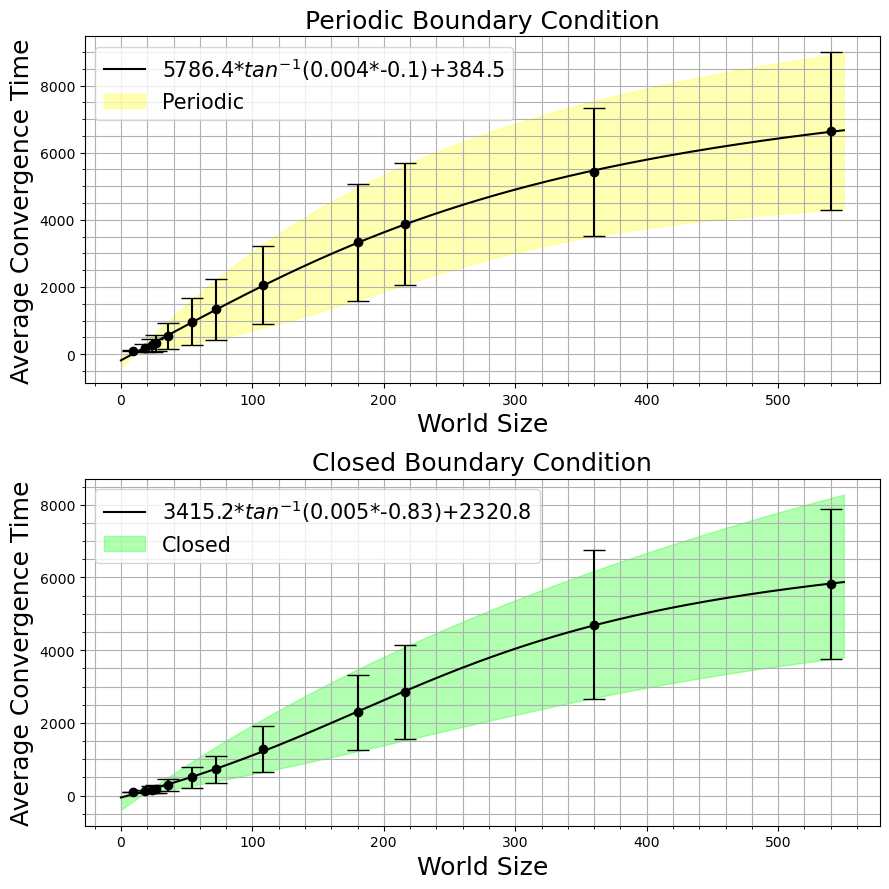

In [7]:
import os                                # import operating system
files = os.listdir("Data")               # print the list of files present in the current working directory

## Open Border Files
periodics_files = np.array([file for file in files if "Periodic" in file])                                                 # Get periodic files - using the file name
periodic_convergence = np.array([pd.read_csv("Data/"+file).mean()['Convergence Time'] for file in periodics_files])  # Get mean periodic convergence time in first 500 iterations
periodic_error = np.array([(pd.read_csv("Data/"+file).std()['Convergence Time']) for file in periodics_files])       # Get std deviation of periodic convergence time in first 500 iterations
periodic_N = np.array([int(periodics_file.split('x')[0].split('_')[1]) for periodics_file in periodics_files])             # Get the size of each world with open border

## Closed Border Files (same as above)
non_p_files = np.array([file for file in files if "Periodic" not in file])
non_p_convergence = np.array([pd.read_csv("Data/"+file).mean()['Convergence Time'] for file in non_p_files])
non_p_errors = np.array([(pd.read_csv("Data/"+file).std()['Convergence Time']) for file in non_p_files])
non_p_N = np.array([int(non_p_file.split('x')[0].split('_')[1]) for non_p_file in non_p_files]) 


## Fitting Curve Function 
def f(x, a, b ,c, d):
    return a*np.arctan(b*x+c) + d                #General Arctangent Function 

fig, ax = plt.subplots(2, 1, figsize=(9, 9))    # Add Subplots
x = np.linspace(0, 550 , 1000)                   # X axis for plot the fitted lines


## Open Border Plotting the time of convergence per world size
params, covariance = curve_fit(f ,periodic_N, periodic_convergence)                                 # Fit the curve on cell sizes and mean convergence time for each world and get the parameters
params_high, covar_2 = curve_fit(f, periodic_N, periodic_convergence + periodic_error)              # Fit for the higher band of errors(std) 
params_low, covar_2 = curve_fit(f, periodic_N, periodic_convergence - periodic_error)               # Fit for the lower band of the errors(std) 

## Plot the error bars
ax[0].errorbar(periodic_N, periodic_convergence, yerr=periodic_error, fmt='o', color='k', capsize=8)

## Plot the Fitted line for mean convergence time
ax[0].plot(x, f(x, params[0], params[1], params[2], params[3]), color='k' , label= f'{params[0].round(1)}' + "$*$" + "$tan^{-1}$" + "(" + f'{params[1].round(3)}' + "*" + f'{params[2].round(2)}' + ')' + '+' + f'{params[3].round(1)}' )

## Fill between the lower and upper band fitted curves with a color 
ax[0].fill_between(x, f(x, params_high[0], params_high[1], params_high[2], params_high[3]),
                   f(x, params_low[0], params_low[1], params_low[2], params_low[3]),
                   alpha=0.3, color='yellow', label="Periodic" )

## Set everythibng else needed for the plots
ax[0].set_xlabel('World Size', fontsize=18)
ax[0].set_ylabel('Average Convergence Time', fontsize=18)
ax[0].grid(which='both')
ax[0].minorticks_on()
ax[0].set_title('Periodic Boundary Condition', fontsize=18)
ax[0].legend(fontsize=15)


## Doing the same for Closed Border Worlds
params, covariance = curve_fit(f ,non_p_N, non_p_convergence)
params_high, covar_2 = curve_fit(f, non_p_N,non_p_convergence + non_p_errors)
params_low, covar_2 = curve_fit(f, non_p_N, non_p_convergence - non_p_errors, maxfev=10000)

ax[1].errorbar(non_p_N, non_p_convergence, yerr=non_p_errors, fmt='o', color='k', capsize=8)
ax[1].plot(x, f(x, params[0], params[1], params[2], params[3]), color='k' , label= f'{params[0].round(1)}' + "$*$" + "$tan^{-1}$" + "(" + f'{params[1].round(3)}' + "*" + f'{params[2].round(2)}' + ')' + '+' + f'{params[3].round(1)}' )
ax[1].fill_between(x, f(x, params_high[0], params_high[1], params_high[2], params_high[3]), f(x, params_low[0], params_low[1], params_low[2], params_low[3]), alpha=0.3, color='lime',  label="Closed")
ax[1].set_xlabel('World Size', fontsize=18)
ax[1].set_ylabel('Average Convergence Time', fontsize=18)
ax[1].grid(which='both')
ax[1].minorticks_on()
ax[1].set_title('Closed Boundary Condition', fontsize=18)
ax[1].legend(loc='upper left', fontsize=15)
plt.tight_layout()

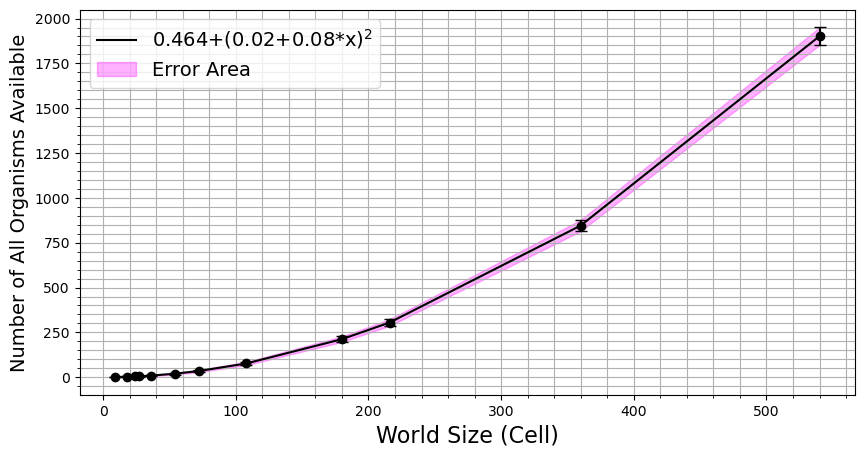

In [14]:
## Making a Huge dataset of our "CSV" files
FINAL_DF = pd.read_csv("Data/"+periodics_files[0])             # Making the first Data Frame with one of the periodic "csv" files (initial dataframe)
FINAL_DF["Cell Size"] = periodic_N[0]

for i in range(1,len(periodics_files)):                        # Add all other periodic files to it
    df_temp = pd.read_csv("Data/" + periodics_files[i])
    df_temp["Cell Size"] = periodic_N[i]
    FINAL_DF = pd.concat( [FINAL_DF , df_temp] , ignore_index=True)

for i in range(0,len(non_p_files)):                            # Add all other non_periodic files to it
    df_temp = pd.read_csv("Data/" + non_p_files[i])
    df_temp["Cell Size"] = non_p_N[i]
    FINAL_DF = pd.concat( [FINAL_DF , df_temp] , ignore_index=True)

    
FINAL_DF.to_csv('FINAL_DATASET.csv')                           # Save the final Dataset


## Making a column of the total number of most found stable organisms and call it "Important Still Shapes"
FINAL_DF["Important Still Shapes"] = FINAL_DF['Block'] + FINAL_DF['Bee Hive'] + FINAL_DF['Loaf'] + FINAL_DF['Boat'] + FINAL_DF['Ship'] + FINAL_DF['Tub'] + FINAL_DF['Ship']

## Making a column of the total number of all organisms and name it "All Shapes"
FINAL_DF["All Shapes"] = FINAL_DF.iloc[:, 2:20].sum(axis=1)

## Making a column of all other kind of organism like oscillators and scarce/rare organism  and name it "Other Shapes"
FINAL_DF["Other Shapes"] = FINAL_DF["All Shapes"] - FINAL_DF["Important Still Shapes"] 

## Finding the average numbr of organisms we found for different sizes of the world with ofcourse their error
All_mean = FINAL_DF.groupby(['Cell Size'])['All Shapes'].mean()
All_std = FINAL_DF.groupby(['Cell Size'])['All Shapes'].std()


## Creating variables for plotting the results
x_mean = All_mean.index.to_numpy()
y_mean = All_mean.to_numpy()
x_upper = All_std.index.to_numpy()
y_upper = All_std.to_numpy() + y_mean
x_lower = All_std.index.to_numpy()
y_lower = -All_std.to_numpy() + y_mean


## Using the polinamial function for fitting lines corresponding to our periviouse observations and the dataset 
def fit_shape(x , a , b , c):
    return (a+b*x)**2+c

3# Finding the fitted cures for the main data and its errors
param_upper  , covar_upper = curve_fit(fit_shape , x_upper  , y_upper)
param_lower  , covar_lower = curve_fit(fit_shape , x_lower  , y_lower)
param  , covar = curve_fit(fit_shape , x_mean  , y_mean)

## Plot the Results
plt.figure(figsize=(10,5))
plt.plot(x_mean, fit_shape(x_mean, param[0], param[1], param[2]), color='k' , label=(f"{param[2].round(3)}"+"+"+"("+f"{param[0].round(2)}"+"+"+f"{param[1].round(2)}*x"+"$)^{2}$") )
plt.errorbar(x_mean , y_mean , yerr= y_upper-y_mean, fmt='o', color='k', capsize=4 )
plt.fill_between( x_mean ,fit_shape(x_upper , param_upper[0], param_upper[1], param_upper[2]) ,
                 fit_shape(x_lower, param_lower[0], param_lower[1], param_lower[2]),
                 alpha=0.3, color='Magenta' , label = ("Error Area"))
plt.ylabel("Number of All Organisms Available" , fontsize=14)
plt.xlabel("World Size (Cell)" , fontsize=16)
plt.grid(which='both')
plt.minorticks_on()
plt.legend( loc = 'upper left' , fontsize=14)
plt.show()

C:\Users\mdvtk\AppData\Local\Temp\ipykernel_21848\4102207324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape_df.loc[:,"Other Shapes"] =  shape_df.loc[:,"Other Shapes"].sub(shape_df.loc[:,"Blinker"])                         # Just to remove "Blinkers" from "Other Shapes" since now we need them separated
C:\Users\mdvtk\AppData\Local\Temp\ipykernel_21848\4102207324.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape_df.iloc[:,2:6] = shape_df.iloc[:,2:6].div(shape_df["All Shapes"], axis=0)*100  

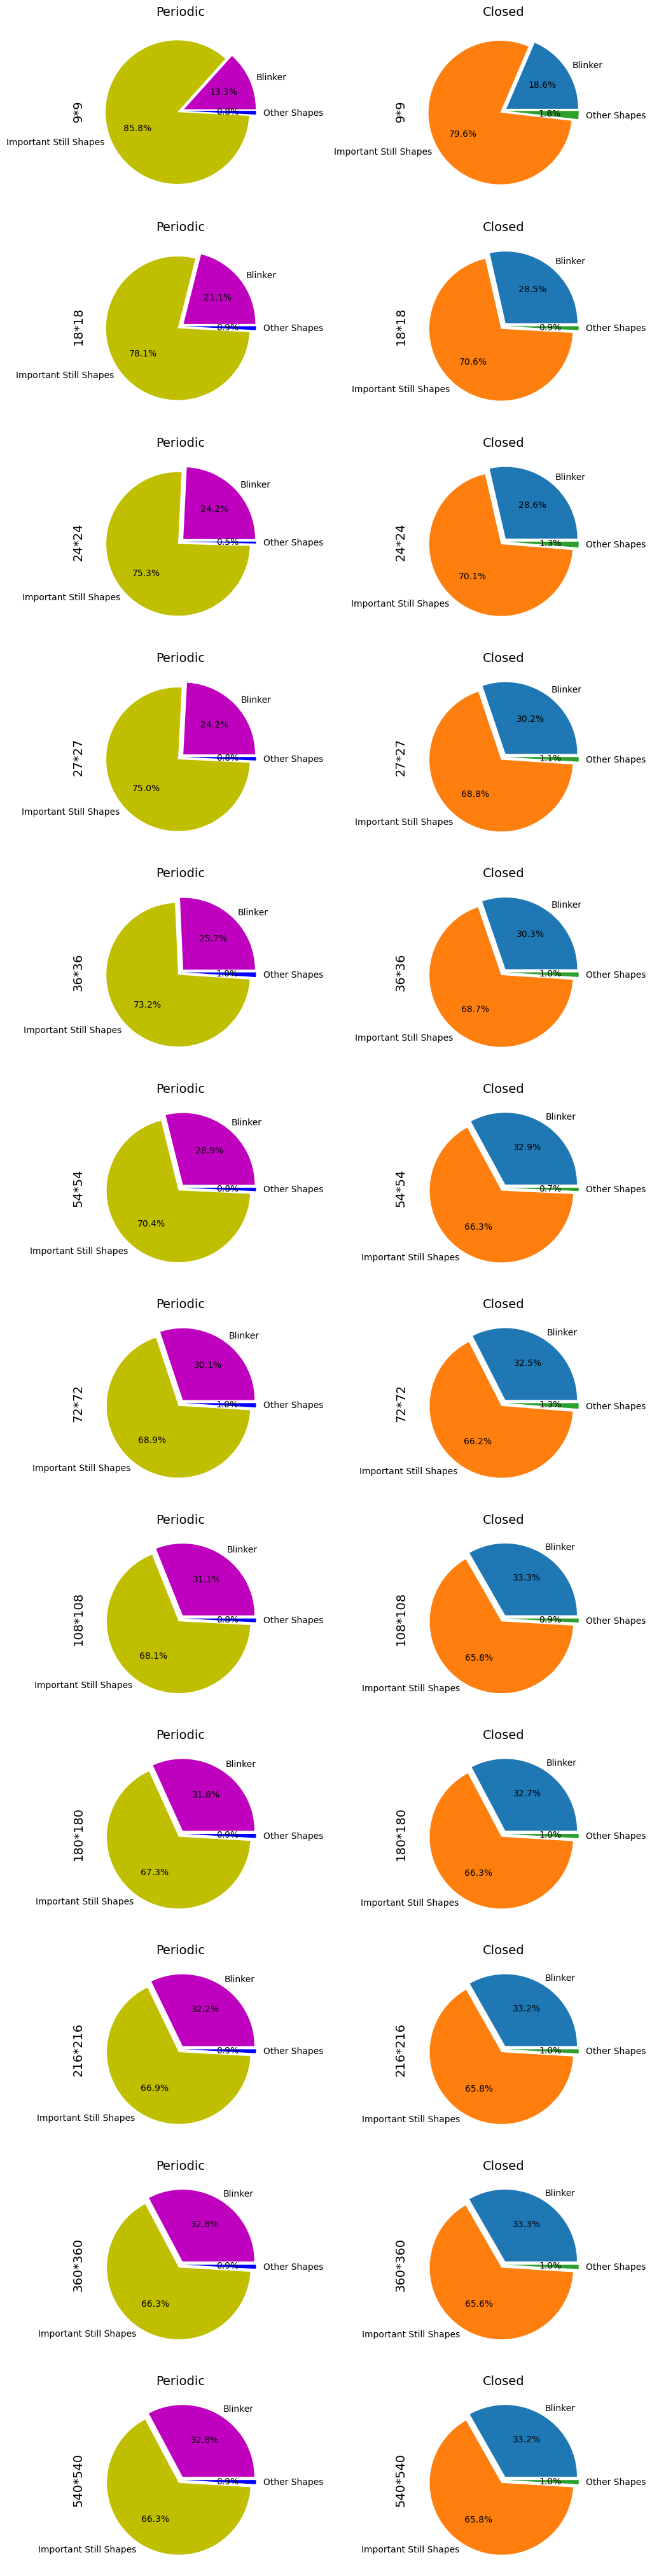

In [21]:
## Creat an special sub_dataframe to have various pie charts to demonstrate later. It contains number of Still organisms, blinkers(most found oscillating organism) and all the other organisms 
shape_df = FINAL_DF[["Periodic" , "Cell Size" , "Blinker" , "Important Still Shapes" , "Other Shapes" , "All Shapes"]] 
shape_df.loc[:,"Other Shapes"] =  shape_df.loc[:,"Other Shapes"].sub(shape_df.loc[:,"Blinker"])                         # Just to remove "Blinkers" from "Other Shapes" since now we need them separated 
shape_df.iloc[:,2:6] = shape_df.iloc[:,2:6].div(shape_df["All Shapes"], axis=0)*100                                     # Normalize and report in percentage
shape_df_g = shape_df.groupby(["Periodic" , "Cell Size"]).mean()                                                        # Get the mean value for each kind of shape for our pie plots

## Make the Pie array just for making the pie charts easier to plot
pie = shape_df_g.iloc[:,0:3].to_numpy()                                 # Getting the shapes
pie_p = pie[0:12,:]                                                     # For open border
pie_non_p = pie[12:,:]                                                  # For closed border
Labels = ["Blinker" , "Important Still Shapes" , "Other Shapes"]        # labels of pie chart
Exploid = [0.05,0.05 ,0.05]                                             # argument for pie charts 
colors = ["m","y" ,"b"]                                                 # colors

## Plotting the charts
fig , Ax = plt.subplots(12,2 , figsize = (12,52))

## For open border
for i in range(12):
    ax = Ax[i,0]
    ax.pie(pie_p[i,:], explode = Exploid  , labels = Labels, colors = colors  , autopct='%1.1f%%')
    ax.set(adjustable='box', aspect='equal')
    ax.set_ylabel(f"{list(shape_df_g.index.to_numpy()[i])[1]}"+"*"+f"{list(shape_df_g.index.to_numpy()[i])[1]}" , fontsize=14)
    ax.set_title("Periodic" , fontsize=14)

## For closed border 
for i in range(12):
    ax = Ax[i,1]
    ax.pie(pie_non_p[i,:], explode = Exploid , labels = Labels  , autopct='%1.1f%%' )
    ax.set(adjustable='box', aspect='equal')
    ax.set_ylabel(f"{list(shape_df_g.index.to_numpy()[i])[1]}"+"*"+f"{list(shape_df_g.index.to_numpy()[i])[1]}" , fontsize=14 )
    ax.set_title("Closed" , fontsize=14)
plt.show()